#ESCENDO 2023 (Intro to Computer Vision)
by MLDA Academics Committee

In [1]:
#STEPS TO UPLOAD AN IMAGE IN GOOGLE COLAB

'''
1
Run this cell (press the play button on the left) to grant access to your own google drive
It will prompt you to login to your google account if you have not done so.
'''

from google.colab import drive
drive.mount('/content/drive')

'''
2
On the left-hand side google colab toolbar,
select (Files) -> (Upload) and upload an image of your choice.

3
Your image would be uploaded to the root folder.

4
In the file tree, navigate to the root folder (by clicking the folder with ../)

5
Rename your image to image.png
'''



Mounted at /content/drive


'\n2\nOn the left-hand side google colab toolbar,\nselect (Files) -> (Upload) and upload an image of your choice.\n\n3\nYour image would be uploaded to the root folder.\n\n4\nIn the file tree, navigate to the root folder (by clicking the folder with ../)\n\n5\nRename your image to image.png\n'

#Import Libraries Used

In [2]:
#import stuff
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt

Reading Images

In [3]:
'''
Getting started with opencv
Reading and saving image with opencv using waitKey
'''

#load an color image
img = cv2.imread('/content/image.png') # import the image from a directory/folder

cv2_imshow(img)

#load a color image in grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(img)

# uncomment the block below to try it out
img = cv2.imread('/image.png')
b1 = img[:,:,0] # get blue channel
g1 = img[:,:,1] # get green channel
r1 = img[:,:,2] # get red channel
cv2_imshow(r1);
cv2_imshow(g1);
cv2_imshow(b1);


AttributeError: ignored

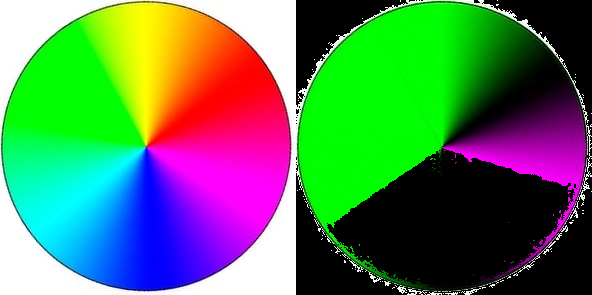

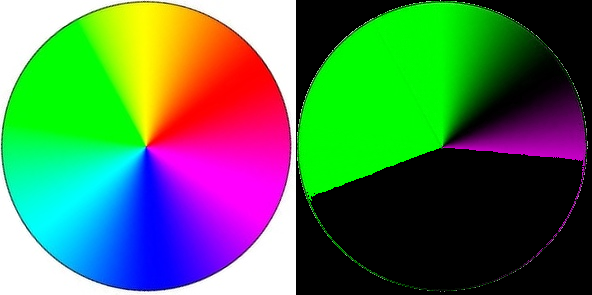

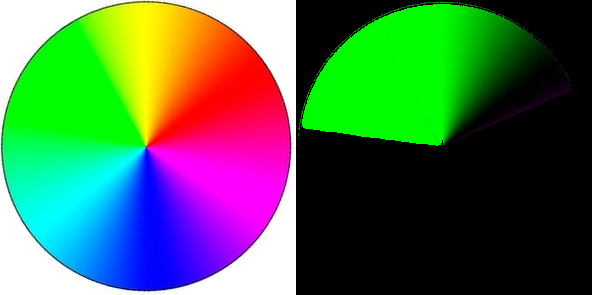

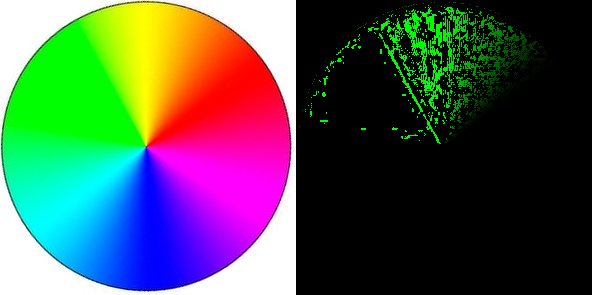

In [ ]:
image = cv2.imread("/rgbwheel.png")

# Convert BGR to RGB
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# define our color range (try changing the values to see diff effects)

# filter out a bit of blue
bottom_limit_1 = np.array([0,0,0])
top_limit_1 = np.array([255,255,250])

# filter out a moderate amount of blue
bottom_limit_2 = np.array([0,0,0])
top_limit_2 = np.array([255,255,200])

# filter out a lot of blue
bottom_limit_3 = np.array([0,0,0])
top_limit_3 = np.array([255,255,30])

# filter out blue completely
bottom_limit_4 = np.array([0,0,0])
top_limit_4 = np.array([255,255,0])


# Threshold the RGB image based on our values
mask_1 = cv2.inRange(rgb, bottom_limit_1, top_limit_1)
mask_2 = cv2.inRange(rgb, bottom_limit_2, top_limit_2)
mask_3 = cv2.inRange(rgb, bottom_limit_3, top_limit_3)
mask_4 = cv2.inRange(rgb, bottom_limit_4, top_limit_4)

# Bitwise-AND mask and original image
output_1 = cv2.bitwise_and(image,rgb, mask=mask_1)
output_2 = cv2.bitwise_and(image,rgb, mask=mask_2)
output_3 = cv2.bitwise_and(image,rgb, mask=mask_3)
output_4 = cv2.bitwise_and(image,rgb, mask=mask_4)

cv2_imshow(np.hstack((image,output_1)))
cv2_imshow(np.hstack((image,output_2)))
cv2_imshow(np.hstack((image,output_3)))
cv2_imshow(np.hstack((image,output_4)))


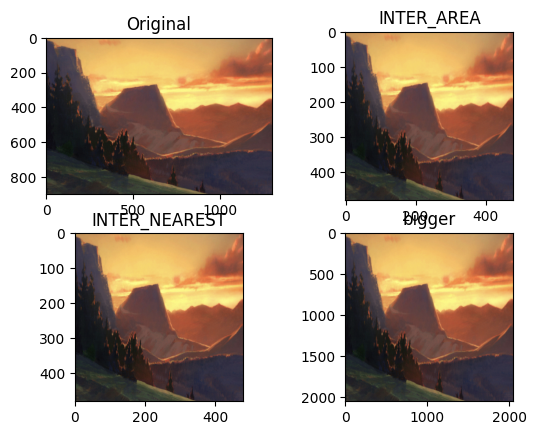

In [ ]:
""" Image Resizing

- cv2.INTER_AREA: This is used when we need to shrink an image.
- cv2.INTER_CUBIC: This is slow but more efficient.
- cv2.INTER_LINEAR: This is primarily used when zooming is required. This is the default interpolation technique in OpenCV.

"""

img = cv2.imread('/image.png')

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

if img is not None:
    interpolation_area = cv2.resize(img,
                               (480, 480),
                               interpolation = cv2.INTER)

    interpolation_nearest = cv2.resize(img,
                               (480, 480),
                               interpolation=cv2.INTER_NEAREST)

    bigger = cv2.resize(img,
                        (2048, 2048))
    titles = ['Original', 'INTER_AREA', "INTER_NEAREST", "bigger"]
    images = [img, interpolation_area, interpolation_nearest, bigger]
    count = 4

    for i in range(count):
        plt.subplot(2, 2, i+1)
        plt.title(titles[i])
        plt.imshow(images[i])
    plt.show()
else:
    print("Check the file path again.")

In [ ]:
""" Real time Edge detection """

cap = cv2.VideoCapture("/vid.mp4")

while True:

    check, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if check:
        # applying canny edge transformation
        edges = cv2.Canny(gray, threshold1=30, threshold2=100)

        # showing the output frame
        # cv2_imshow(frame)
        # cv2_imshow(edges)
        cv2_imshow(np.hstack((gray,edges)))

        if cv2.waitKey(5) & 0xFF == 27:
            break

cap.release()
cv2.destroyAllWindows()

error: ignored

# Mediapipe
- Hand landmarks examples

In [ ]:
!pip install mediapipe

import cv2
import mediapipe as mp
import time

cap = cv2.VideoCapture(0)

mpHands = mp.solutions.hands
hands = mpHands.Hands(static_image_mode=False,
                      max_num_hands=2,
                      min_detection_confidence=0.5,
                      min_tracking_confidence=0.5)
mpDraw = mp.solutions.drawing_utils

pTime = 0
cTime = 0

while True:
    success, img = cap.read()
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = hands.process(imgRGB)
    #print(results.multi_hand_landmarks)

    if results.multi_hand_landmarks:
        for handLms in results.multi_hand_landmarks:
            for id, lm in enumerate(handLms.landmark):
                #print(id,lm)
                h, w, c = img.shape
                cx, cy = int(lm.x *w), int(lm.y*h)
                #if id ==0:
                cv2.circle(img, (cx,cy), 3, (255,0,255), cv2.FILLED)

            mpDraw.draw_landmarks(img, handLms, mpHands.HAND_CONNECTIONS)


    cTime = time.time()
    fps = 1/(cTime-pTime)
    pTime = cTime

    cv2.putText(img,str(int(fps)), (10,70), cv2.FONT_HERSHEY_PLAIN, 3, (255,0,255), 3)

    cv2.imshow("Image", img)
    if (cv2.waitKey(1)==ord('q')):
        break


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 24.0 MB/s eta 0:00:00


error: ignored

# Serial Communication

In [ ]:
!pip install serial

import serial
ser = serial.Serial('/dev/ttyUSB0')  # open serial port
print(ser.name)         # check which port was really used
ser.write(b'hello')     # write a string
ser.close()             # close port

with serial.Serial('/dev/ttyS1', 19200, timeout=1) as ser:
    x = ser.read()          # read one byte
    s = ser.read(10)        # read up to ten bytes (timeout)
    line = ser.readline()   # read a '\n' terminated line


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.2 MB/s eta 0:00:00


AttributeError: ignored